In [1]:
from PIL import Image
import requests
from modules.seg import Seg
from modules.select import Select
from modules.replace import Replace
from modules.result import Result

/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


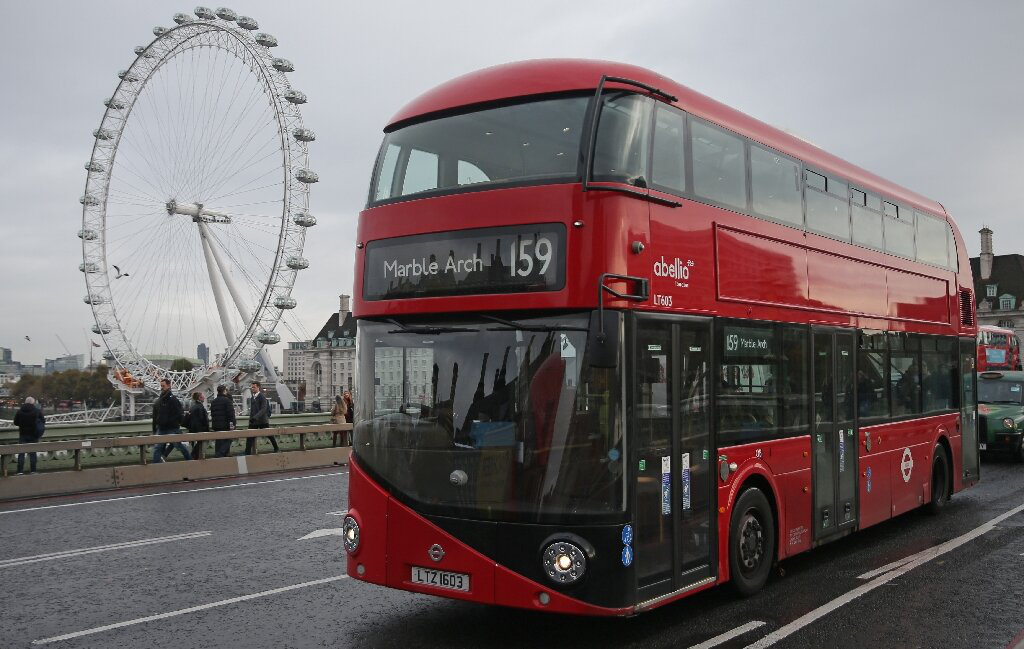

In [2]:
image = Image.open('assets/red_bus.jpeg').convert('RGB')
image

In [3]:
step = 'OBJ0=SEG(image=IMAGE)'

In [4]:
seg = Seg(device='cpu')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/transformers/models/maskformer/image_processing_maskformer.py:411: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/transformers/models/maskformer/image_processing_maskformer.py:418: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(


In [5]:
state = {
    'IMAGE': image
}

In [6]:
output, html = seg.execute(step, state)

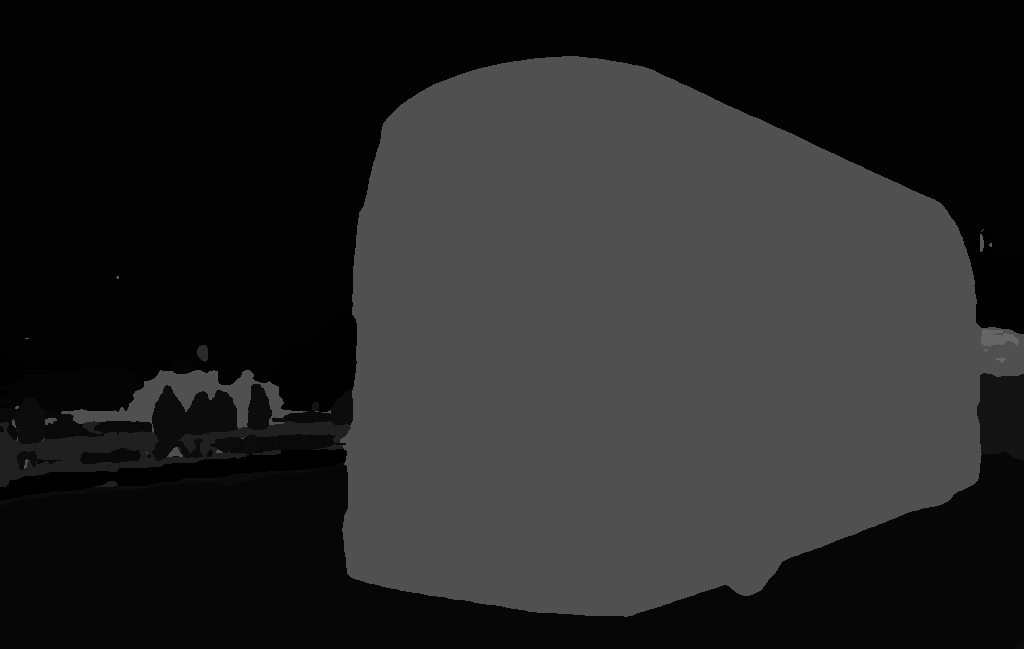

In [7]:
import numpy as np
Image.fromarray(output.astype(np.uint8))

In [8]:
np.unique(output)

array([  0,   1,   2,   4,   6,   9,  11,  12,  13,  20,  32,  43,  80,
        87, 102])

In [9]:
[seg.model.config.id2label[id_] for id_ in np.unique(output)]

['wall',
 'building',
 'sky',
 'tree',
 'road, route',
 'grass',
 'sidewalk, pavement',
 'person',
 'earth, ground',
 'car',
 'fence',
 'signboard, sign',
 'bus',
 'street lamp',
 'van']

In [10]:
state.keys()

dict_keys(['IMAGE', 'OBJ0'])

In [11]:
step2 = "OBJ1=SELECT(image=IMAGE,object=OBJ0,query='red bus',category=None)"

In [12]:
select = Select(seg.model.config.id2label, seg.model.config.label2id)

In [13]:
output, html = select.execute(step2, state)

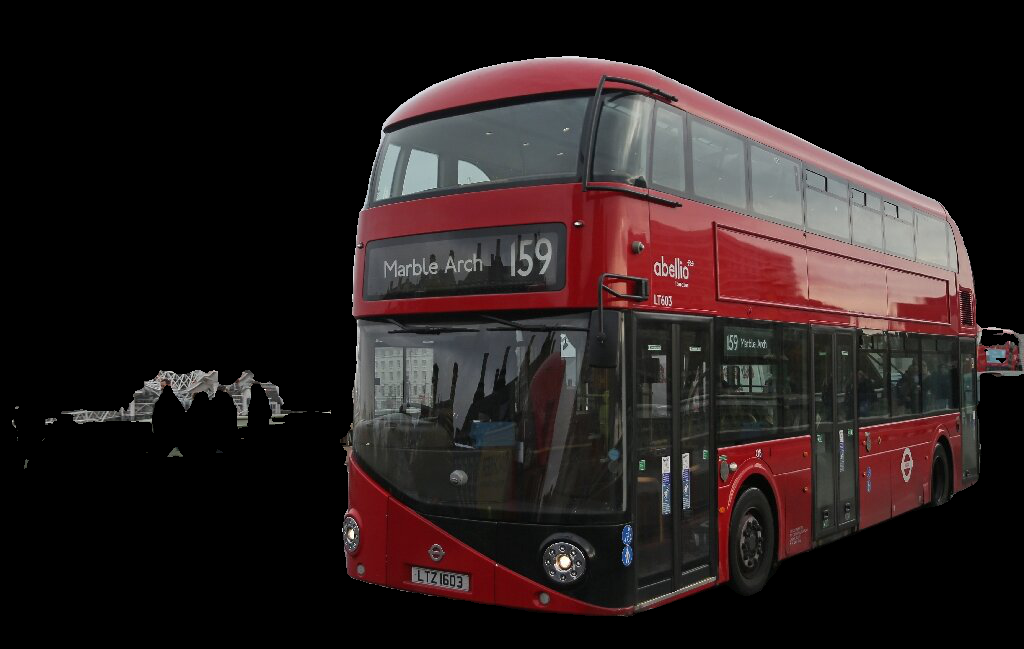

In [14]:
html['output']

In [15]:
step3 = "IMAGE0=REPLACE(image=IMAGE,object=OBJ1,prompt='blue bus')"

In [16]:
replace = Replace()

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [17]:
state.keys()

dict_keys(['IMAGE', 'OBJ0', 'OBJ1'])

In [18]:
output, html = replace.execute(step3, state)

  0%|          | 0/50 [00:00<?, ?it/s]

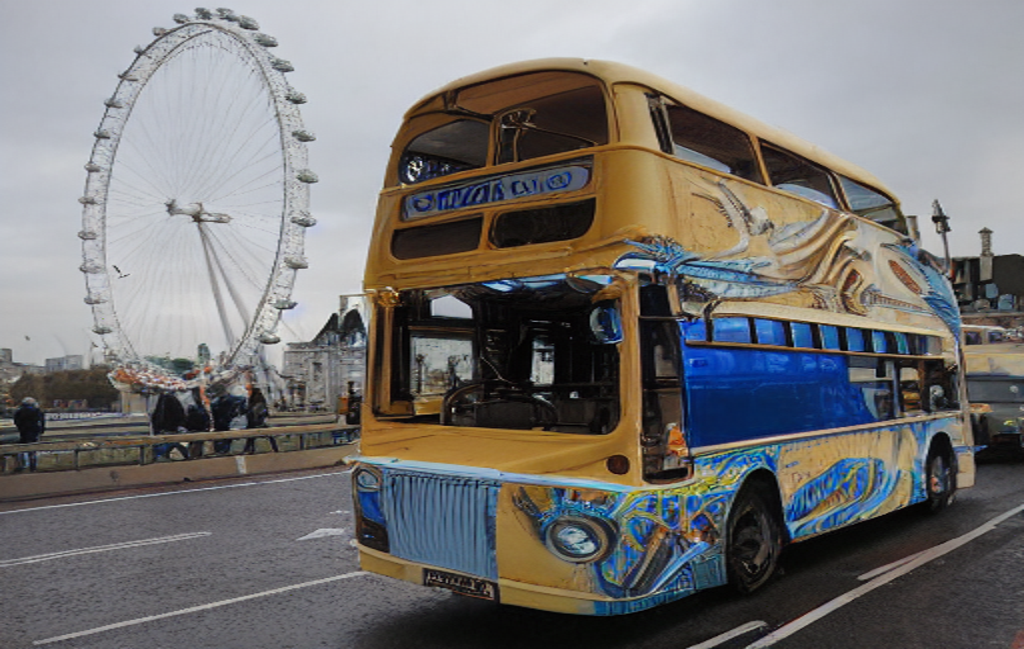

In [19]:
output

In [20]:
step4 = "OBJ2=SEG(image=IMAGE0)"

In [21]:
output, html = seg.execute(step4, state)

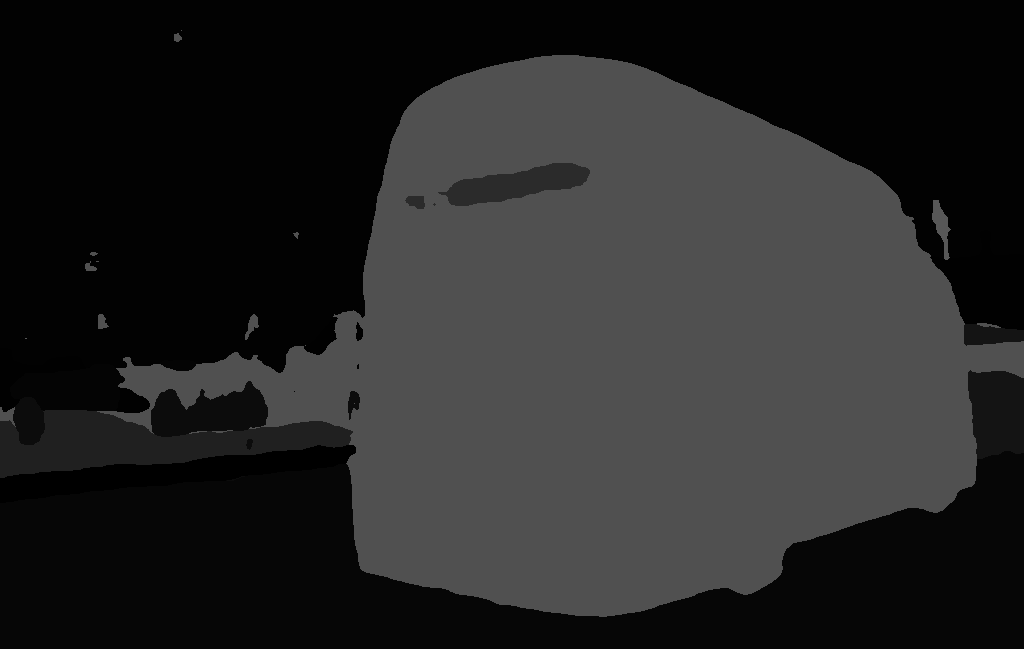

In [22]:
Image.fromarray(output.astype(np.uint8))

In [23]:
[seg.model.config.id2label[id_] for id_ in np.unique(output)]

['wall',
 'building',
 'sky',
 'tree',
 'road, route',
 'sidewalk, pavement',
 'person',
 'car',
 'fence',
 'signboard, sign',
 'bus',
 'street lamp']

In [24]:
step5 = "OBJ3=SELECT(image=IMAGE0,object=OBJ2,query='road',category=None)"

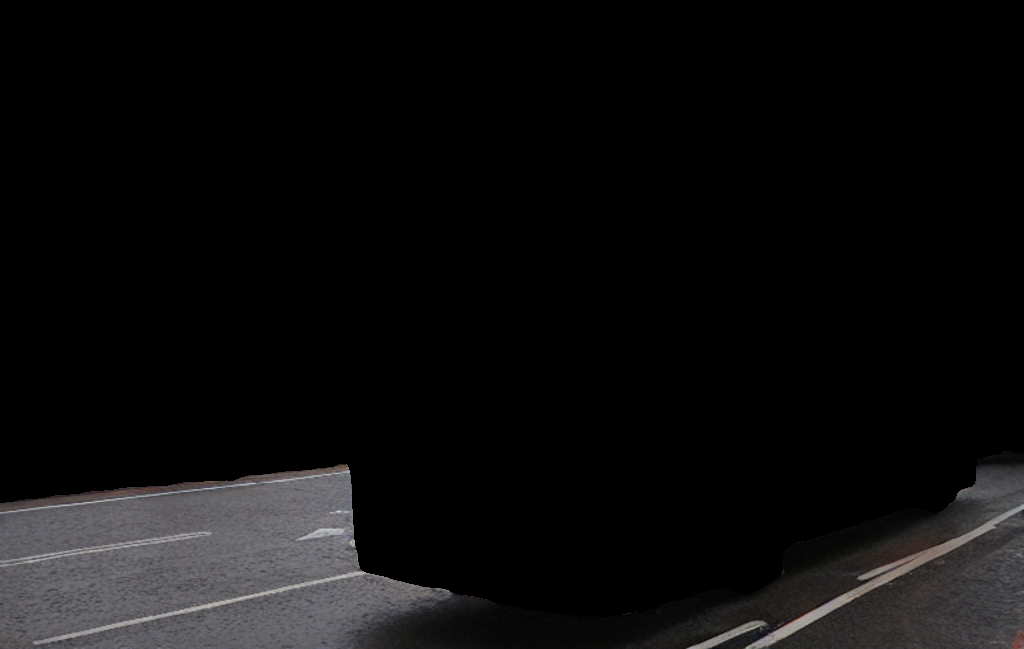

In [25]:
output, html = select.execute(step5, state)
html['output']

In [26]:
step6 = "IMAGE1=REPLACE(image=IMAGE0,object=OBJ3,prompt='dirt road')"

  0%|          | 0/50 [00:00<?, ?it/s]

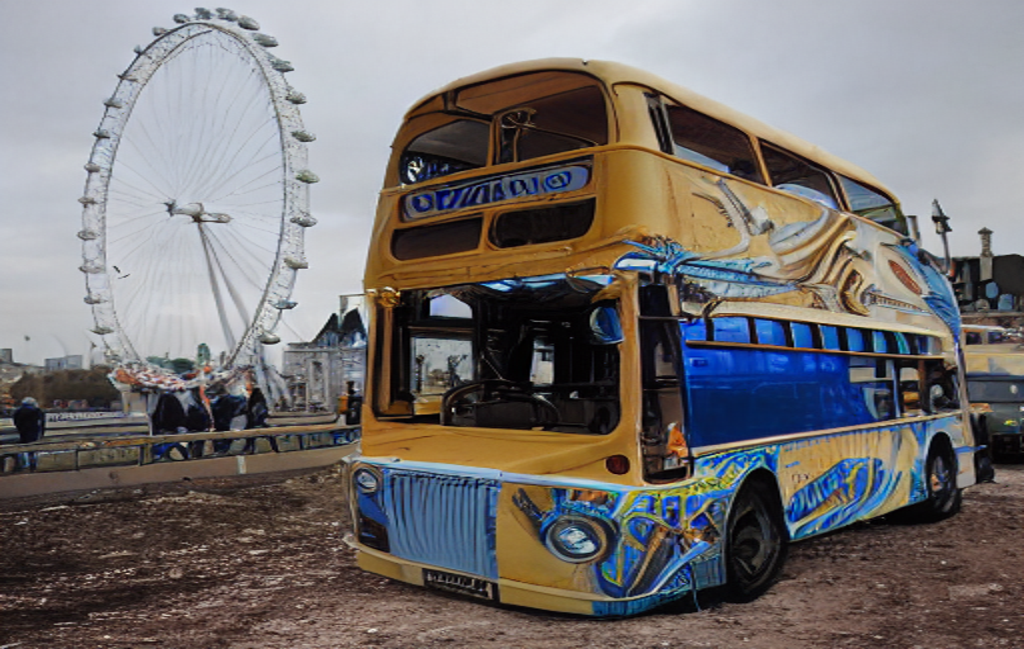

In [27]:
output, html = replace.execute(step6, state)
output

In [28]:
step7 = "FINAL_RESULT=RESULT(var=IMAGE1)"

In [29]:
result = Result()

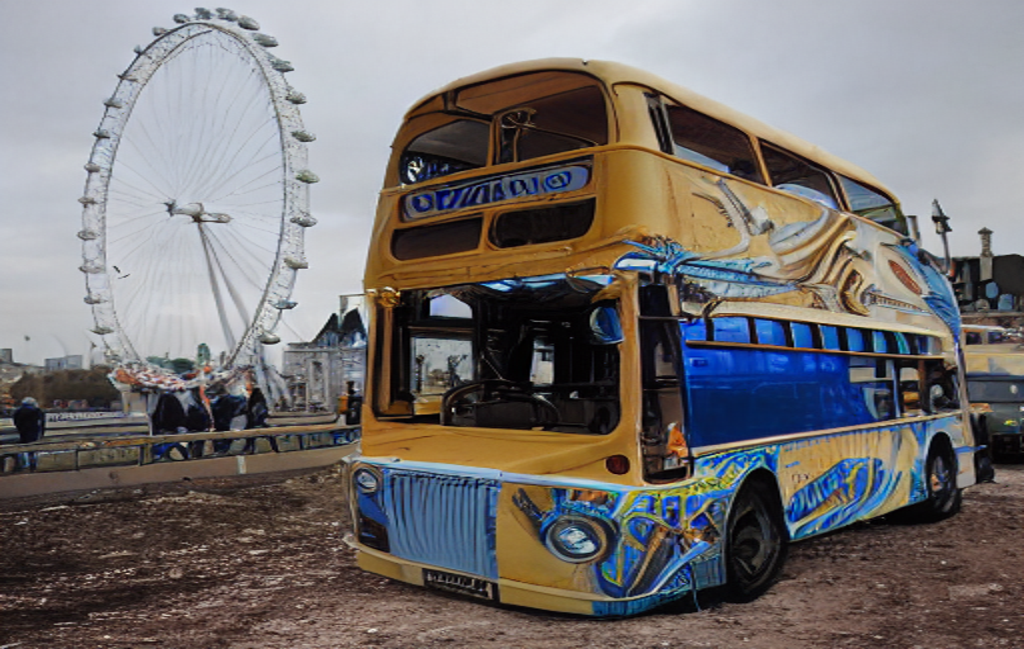

In [30]:
output, html = result.execute(step7, state)
state['FINAL_RESULT']['var']